In [4]:
from tensorflow.keras.layers import Dense, Flatten , Dropout , BatchNormalization
from tensorflow.keras.models import Model
from keras.applications.densenet import DenseNet201


from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import numpy as np
import matplotlib.pyplot as plt

C:\Users\kesha\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\kesha\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\kesha\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
C:\Users\kesha\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [5]:
IMAGE_SIZE = [128, 128]

In [6]:
# add preprocessing layer to the front of 
r = DenseNet201(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [7]:
# don't train existing weights
for layer in r.layers:
  layer.trainable = False

In [8]:
# our layers - you can add more if you want
x = Flatten()(r.output)
x = BatchNormalization()(x)
x = Dense(256, activation='relu')(x)
prediction = Dense(4, activation='softmax')(x)

In [9]:
# create a model object
model = Model(inputs=r.input, outputs=prediction)

# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 zero_padding2d (ZeroPaddin  (None, 134, 134, 3)          0         ['input_1[0][0]']             
 g2D)                                                                                             
                                                                                                  
 conv1/conv (Conv2D)         (None, 64, 64, 64)           9408      ['zero_padding2d[0][0]']      
                                                                                                  
 conv1/bn (BatchNormalizati  (None, 64, 64, 64)           256       ['conv1/conv[0][0]']      

In [10]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [12]:
import tensorflow as tf
checkpoint_path = 'check_points'
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path,
    save_weights_only=True,
    save_best_only=True,
    monitor='val_loss',
    mode='min',
    verbose=1
)

In [13]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('Training',
                                                 target_size = (128, 128),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('Testing',
                                            target_size = (128, 128),
                                            batch_size = 32,
                                            class_mode = 'categorical')


Found 3038 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


In [14]:
from tensorflow import keras
early_stop=keras.callbacks.EarlyStopping(monitor='val_loss',patience=10)

In [16]:
# fit the model
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set),
  callbacks=[checkpoint_callback]
)

Epoch 1/10
95/95 [==============================] - ETA: 0s - loss: 0.1363 - accuracy: 0.9526
Epoch 1: val_loss improved from inf to 0.25538, saving model to check_points
95/95 [==============================] - 151s 2s/step - loss: 0.1363 - accuracy: 0.9526 - val_loss: 0.2554 - val_accuracy: 0.9112
Epoch 2/10
95/95 [==============================] - ETA: 0s - loss: 0.1370 - accuracy: 0.9539
Epoch 2: val_loss improved from 0.25538 to 0.23406, saving model to check_points
95/95 [==============================] - 154s 2s/step - loss: 0.1370 - accuracy: 0.9539 - val_loss: 0.2341 - val_accuracy: 0.9365
Epoch 3/10
95/95 [==============================] - ETA: 0s - loss: 0.1542 - accuracy: 0.9503
Epoch 3: val_loss did not improve from 0.23406
95/95 [==============================] - 151s 2s/step - loss: 0.1542 - accuracy: 0.9503 - val_loss: 0.2839 - val_accuracy: 0.9315
Epoch 4/10
95/95 [==============================] - ETA: 0s - loss: 0.1697 - accuracy: 0.9463
Epoch 4: val_loss did not imp

In [1]:
#from tensorflow.keras.models import Model, load_model
#from tensorflow.keras.layers import Input, Average
#model = load_model("C:\Users\kesha\Desktop\code\Untitled Folder\cp")

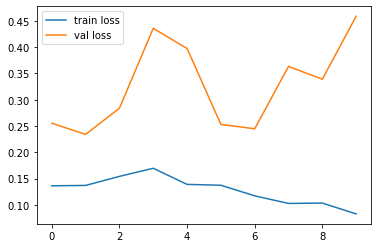

<Figure size 432x288 with 0 Axes>

In [21]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

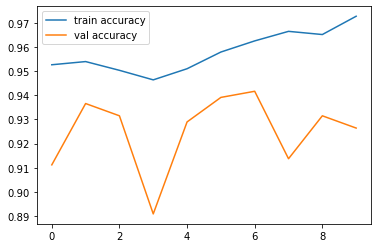

<Figure size 432x288 with 0 Axes>

In [22]:
# accuracies
plt.plot(r.history['accuracy'], label='train accuracy')
plt.plot(r.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')